In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import csv
from numpy import linalg as LA
from sklearn.manifold import TSNE
import seaborn as sns

### plotImage
plots the 10 different images for each unique label in the given dataset. 
Parameters:
* labels: label of the data

* unique: unique labels

* data: any data with 2D shape

* dim: dimension of the image in the data

* cmap: colormap to plot the image

In [2]:
def plotImage(labels, unique, data, dim, cmap=None):
    fig, axs = plt.subplots(len(unique), count, figsize=(20,20))
    for i, u in enumerate(unique):
        for j in range(count):
            axs[i,j].imshow(data[labels==u][j].reshape((dim,dim)), cmap=cmap)
            axs[i,j].axis('off')

### plotMean

returns the mean of the given data
> mean is calculated among the columns

plots the mean

* data: any data with 2D shape

In [3]:
def plotMean(data):
    mean = data.mean(axis=0)
    dim = int(np.sqrt(data.shape[1]))
    plt.imshow(mean.reshape((dim,dim)), cmap='gray_r')
    plt.title("Mean digit image")
    plt.axis('off')
    return mean

### centerData
Subtracts the mean values from the data
Parameters:

* data: any data with 2D shape
    
* mean: data mean

In [4]:
def centerData(data, mean):
    return data - mean

 ### computerCovariance
Computes covariance of the given data 
> $cov(X) = X^TX/n$

* data: any data with 2D shape

In [5]:
def computeCovariance(data):
    cov = np.matmul(data.T , data)/len(data)
    return cov

### getEigVecsVals
Calculates the eigenvalues and eigenvectors. The results are sorted in the ascending order.

* data: any data with 2D shape



In [6]:
def getEigVecsVals(data):
    return LA.eigh(data)

### plotEigens
plots the top 100 eigenvectors which have higher eigenvalues

Parameters:
* eigvectors: $NXN$ 2D Matrix. One row represents one eigenvector

* dim: dimension of the image in the data


In [7]:
def plotEigens(eigvectors, dim):
    fig, axs = plt.subplots(10, count, figsize=(15,15))
    for i in range(0, 100):
        x, y = i//10, i%10
        axs[x,y].imshow(eigvectors[i].reshape((dim,dim)), cmap='gray_r')
        axs[x,y].axis('off')

### plotScree
plots the top 50 eigenvalues

Parameters:
    
* eigVals: 1D array with the eigenvalues.



In [8]:
def plotScree(eigVals):
    x = np.linspace(0, 49, 50)
    plt.scatter(x, eigVals[:50])
    plt.plot(eigVals[:50])
    plt.title("Scree Plot(Largest 50 eigenvalues)")
    plt.show()

### Projection
Projects given data to the given number of dimensions by using eigenvectors

> Projection: $ Z = W^TX $

    W represents the eigenvectors
    X is the data

Parameters:
* data: any data with 2D shape
    
* eigvectors: $NXN$ 2D Matrix. One row represents one eigenvector

* dim: Reduced dimension of the data

Note: Since my data is kept in rows, I used the transpose of the Projection formula above.

In [9]:
def projection(data, vectors, dim):
    return np.matmul(vectors[:dim], data.T)

### plotProjection

Plots given 2D data with labels on

Parameters:
* finalData: $NX2$ shaped data
    
* labels: labels of the given data 

* title: title of the plot (string)
    
* labelLen: length of the unique labels to get the enough number of colors in the plot (integer)



In [10]:
def plotProjection(finalData, labels, title, labelLen):
    sns.scatterplot(x=finalData[:,0], y=finalData[:,1], hue=labels,
                    palette=sns.color_palette("hls", labelLen)).set(title=title)

### reconstruct

Given image is reconstructed by taking its dot product with the corresponding eigenvectors then, adding the mean of the dataset.
> Reconstruction: $ X = WZ + M $

    W represents the eigenvectors
    Z is the reduced data
    M is the mean of the dataset

Parameters:
* image: image data
    
* testMean: 1 dimensional mean of the dataset

* eigvecs: $NXN$ data
    
* compNum: component number is applied on the image



In [11]:
def reconstruct(image, testMean, eigvecs, compNum):
    return image.dot(eigvecs[:compNum]) + testMean

### projectReconstruct
Projects and reconstructs the given data by calling the functions above.

In [12]:
def projectReconstruct(data, mean, compNum, eigVecs):
    finalData = projection(data, eigVecs, compNum)
    reconstructed = reconstruct(finalData, mean, eigVecs, compNum)
    return reconstructed

### Projection
Projects and reconstructs the given data by increasing the reduced dimension by 10 in each iteration.
Plots each result

Parameters:
* data: image dataset (2D)
    
* mean: mean of the dataset

* index: index of the image in the dataset
    
* eigVecs: $NXN$ 2D Eigenvector Matrix. One row represents one eigenvector

* dim: One dimension of one image (NXN)

* start and end: the start and end values of the component number

* cmap: colormap



In [13]:
def reconstructAll(data, mean, index, eigVecs, dim, start=2, end=None, cmap=None):
    if end is None:
        end = dim*dim
    fig, axs = plt.subplots((end-start)//100 + 1, 10, figsize=(15,15))
    for i in range(start, end, 10):
        reconstructed = projectReconstruct(data[index], mean, i, eigVecs)
        x, y = (i-start)//100, ((i-start)%100)//10
        axs[x, y].imshow(reconstructed.reshape((dim,dim)), cmap=cmap)
        axs[x, y].axis('off')
    reconstructed = projectReconstruct(data[index], mean, end, eigVecs)
    axs[(end-start)//100, 9].imshow(reconstructed.reshape((dim,dim)), cmap=cmap)
    axs[(end-start)//100, 9].axis('off')

### getExplainedVarRatio

Calculates the explained variance ratio by summing the each eigenvalues in each iterations and then getting its ratio with the summation of all eigenvalues. 

Parameters:
    
* eigVals: One dimensional numpy array with the eigenvalues in the descending order

* stop: stop condition for the calculation of elbow point


In [14]:
def getExplainedVarRatio(eigVals, stop=0.0005):
    sumVals = np.sum(eigVals)
    curSum = 0
    expVarRatio = list()
    index, found = 0, False
    for i,val in enumerate(eigVals):
        curSum += val
        if val/sumVals < stop and not found:
            index = i
            found = True
        expVarRatio.append(curSum/sumVals)
    plt.plot(expVarRatio)
    plt.ylabel("Explained Variance Ratio")
    plt.xlabel("Dimensions")
    plt.show()
    return expVarRatio, index

# Mnist

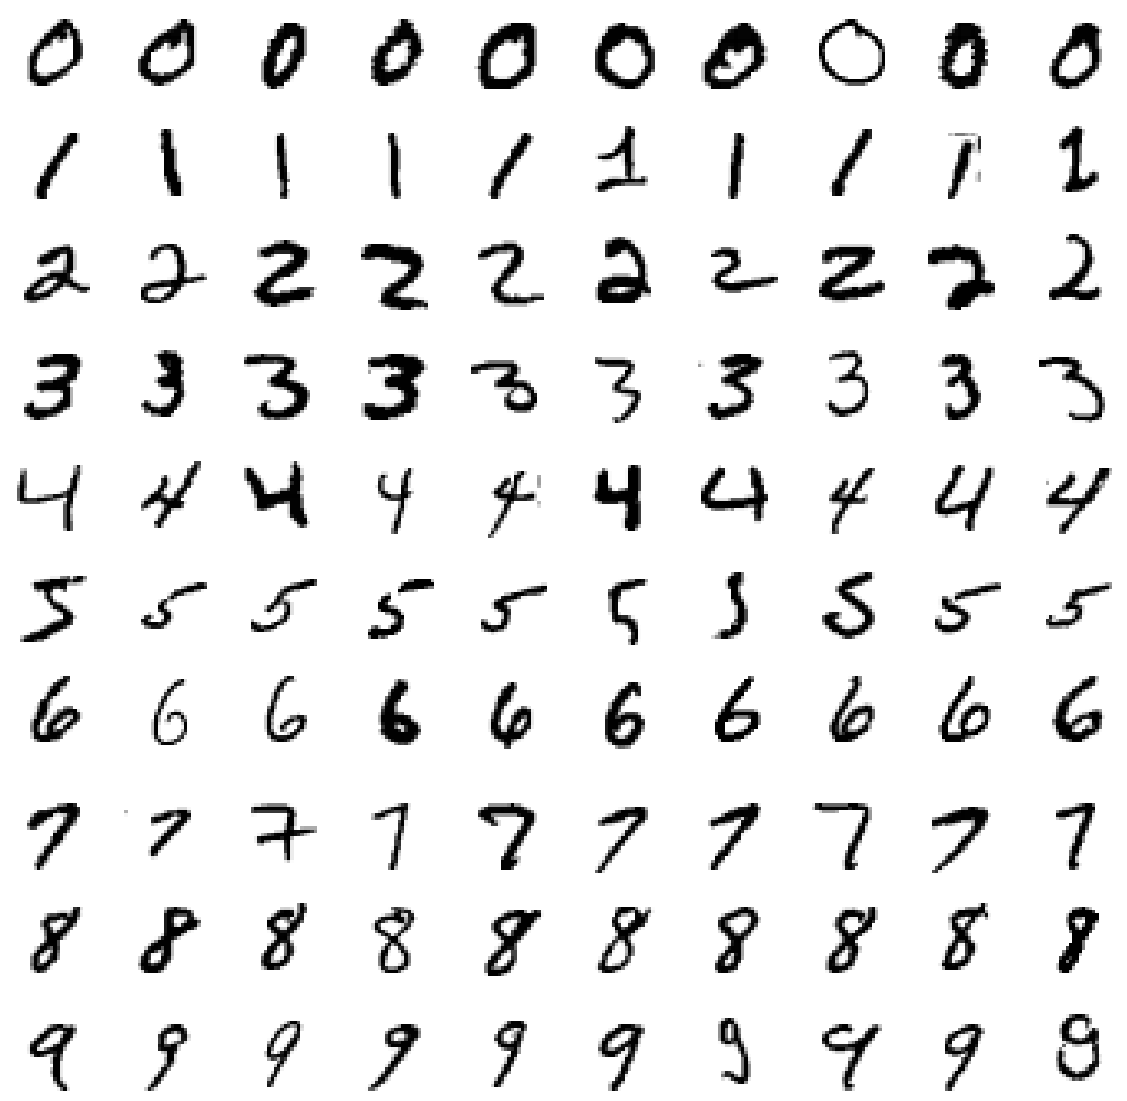

In [15]:
# Read data
data=pd.read_csv("mnist_train.csv")
data = np.array(data, dtype='float')
labels = data[:, 0]
data = data[:,1:]
digits = [int(digit) for digit in np.unique(labels)]
count = 10
dim = int(np.sqrt(data.shape[1]))
plotImage(labels, digits, data, dim, 'gray_r')

### Eigenvector calculation steps
* Get mean of the data
* Center the data by substracting the mean
* Get covariance of the centered data
* Calculate eigenvalues and eigenvectors of the covariance matrix. Then sort them in the descending order

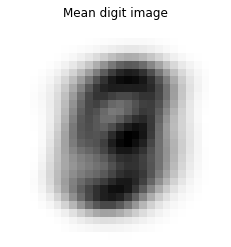

In [16]:
mean = plotMean(data)
cenData = centerData(data, mean)
cov = computeCovariance(cenData)
eigvals, eigvectors = getEigVecsVals(cov)
eigvals = eigvals[::-1]
eigvectors = eigvectors.T[::-1]


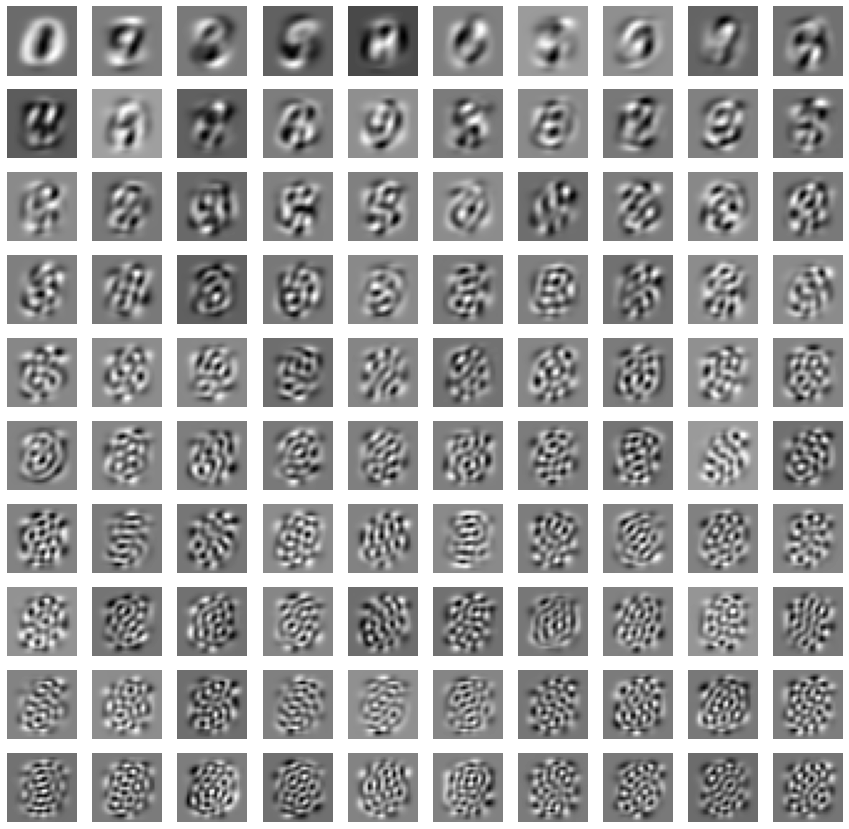

In [17]:
plotEigens(eigvectors, dim)

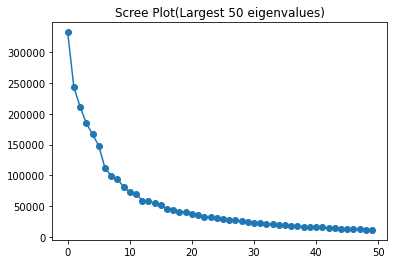

332719.122035444

In [18]:
plotScree(eigvals)
eigvals[0]

## Mnist Test

In [19]:
testSet = np.array(pd.read_csv("mnist_test.csv"), dtype='float')
testLabels = [int(digit) for digit in testSet[:, 0]]
testData = testSet[:,1:]
testMean = testData.mean(axis=0)
testCenData = centerData(testData, testMean)

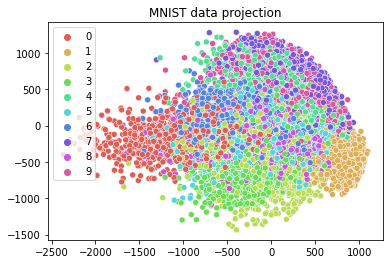

In [20]:
finalData = projection(testCenData, eigvectors, 2).T
plotProjection(finalData, testLabels, "MNIST data projection", 10)

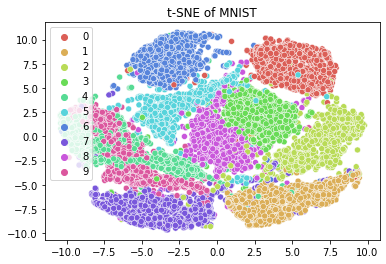

In [21]:
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(testData)
plotProjection(tsne, testLabels, "t-SNE of MNIST", 10)

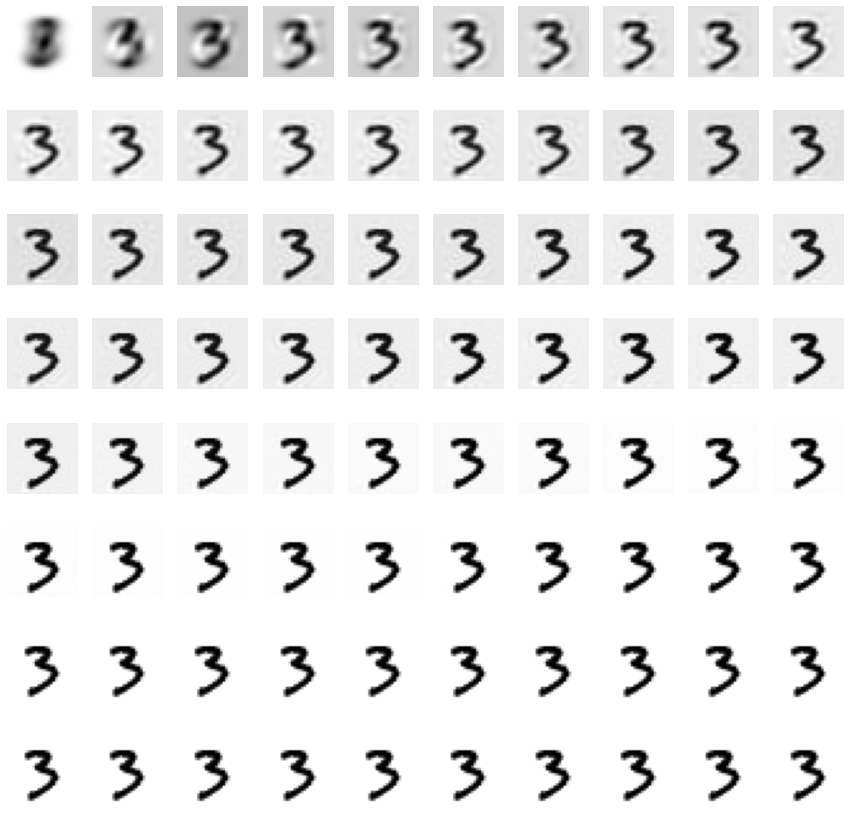

In [22]:
reconstructAll(testCenData, testMean, 30, eigvectors, dim, cmap='gray_r')

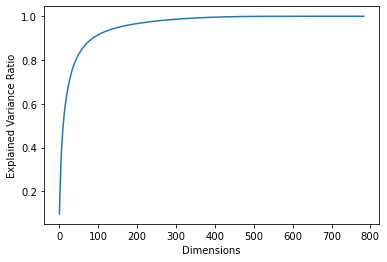

0.9459545998867482 144


In [23]:
expVarRatio, index = getExplainedVarRatio(eigvals)
print(expVarRatio[index], index)

(-0.5, 27.5, 27.5, -0.5)

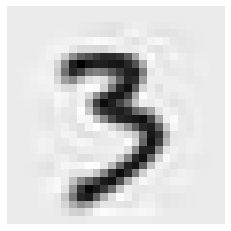

In [24]:
reconstructed = projectReconstruct(testCenData[30], testMean, index, eigvectors)
plt.imshow(reconstructed.reshape((dim,dim)), cmap='gray_r')
plt.axis('off')

# Fashion Dataset

#### Reconstruction with the eigenvectors calculated by the MNIST dataset.

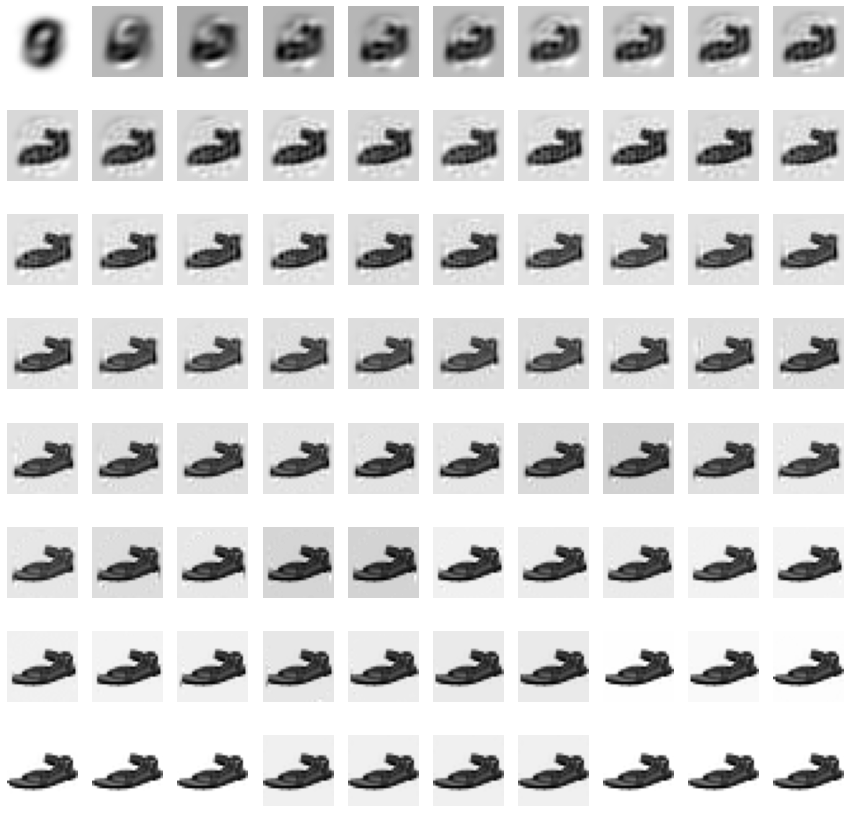

In [25]:
fTestData = np.array(pd.read_csv('fashion-mnist_test.csv'), dtype='float')
fTestData = fTestData[:,1:]
fTestCenData =  fTestData - testMean
reconstructAll(fTestCenData, testMean, 30, eigvectors, dim, cmap='gray_r')

#### Reconstruction with the eigenvectors calculated by the MNIST dataset.

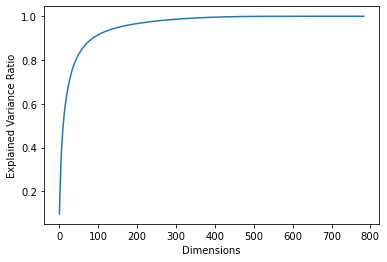

0.9459545998867482 144


In [26]:
fashionExpVarRatio, index = getExplainedVarRatio(eigvals)
print(fashionExpVarRatio[index], index)

(-0.5, 27.5, 27.5, -0.5)

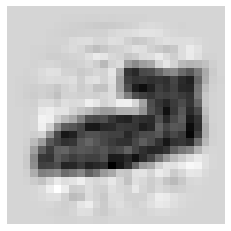

In [27]:
fashionReconstructed = projectReconstruct(fTestCenData[30], testMean, index, eigvectors)
plt.imshow(fashionReconstructed.reshape((dim,dim)), cmap='gray_r')
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

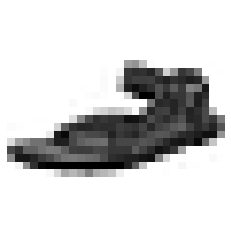

In [28]:
plt.imshow(fTestData[30].reshape((dim,dim)), cmap='gray_r')
plt.axis('off')

# Human Faces

In [29]:
humanData =np.load("olivetti_faces.npy")
targets=np.load("olivetti_faces_target.npy")
humanData = np.reshape(humanData, (humanData.shape[0], humanData.shape[1]*humanData.shape[2]))
sliceIndex = humanData.shape[0]*80//100

humanTrain = humanData[:sliceIndex]
trainTarget = targets[:sliceIndex]

humanTest = humanData[sliceIndex:]
testTarget = targets[sliceIndex:]

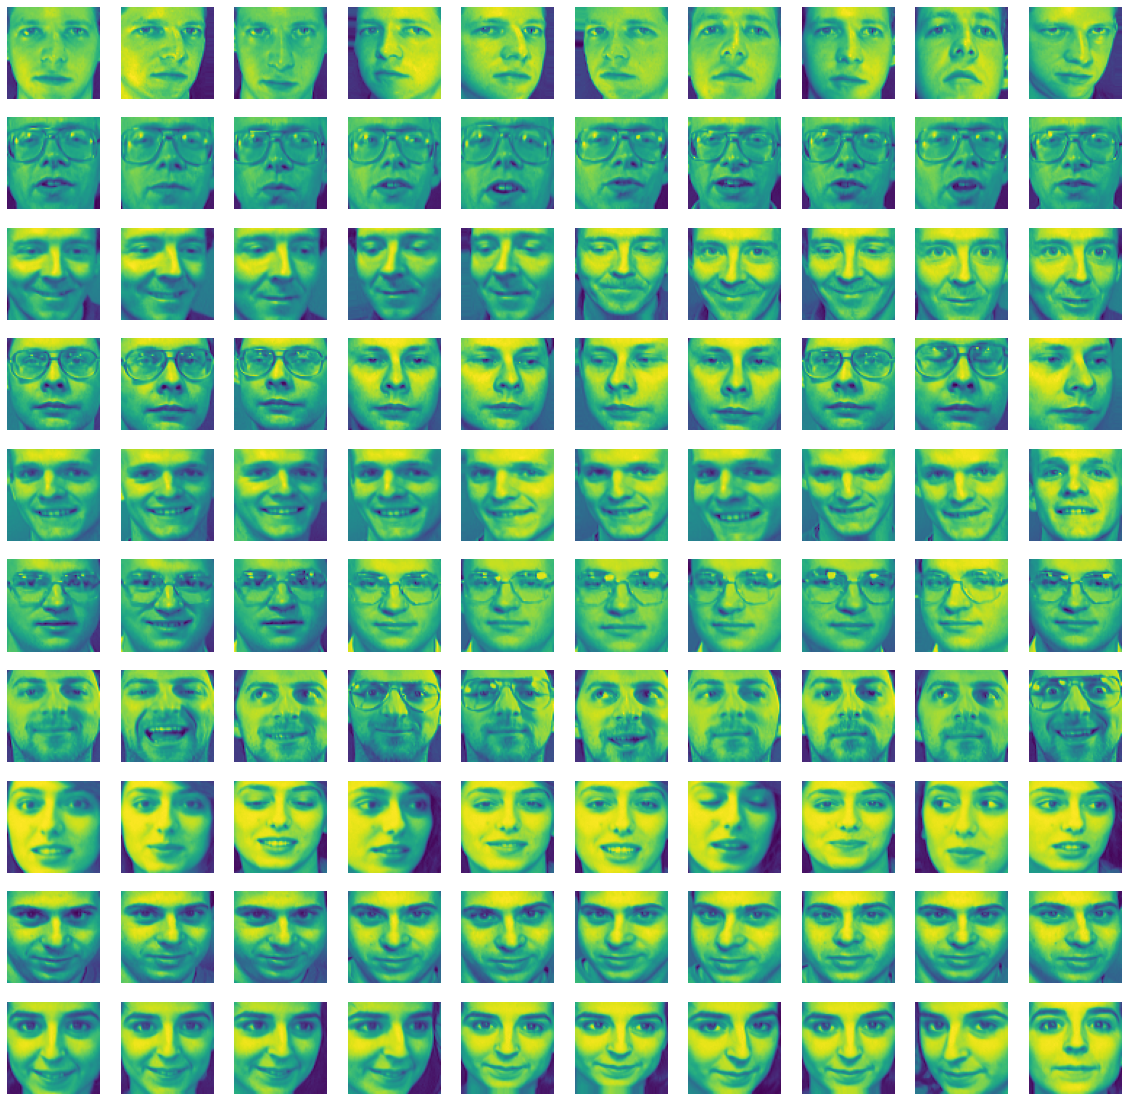

In [30]:
utargets = [int(target) for target in np.unique(targets)]
count = 10
humanDim = int(np.sqrt(humanTrain.shape[1]))
plotImage(targets, utargets[:10], humanData, humanDim)

In [31]:
# plotImage(trainTarget, np.unique(trainTarget), humanTrain, humanDim)

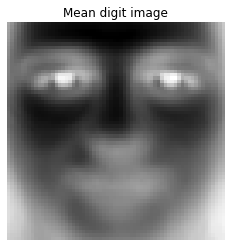

In [32]:
humanMean = plotMean(humanTrain)

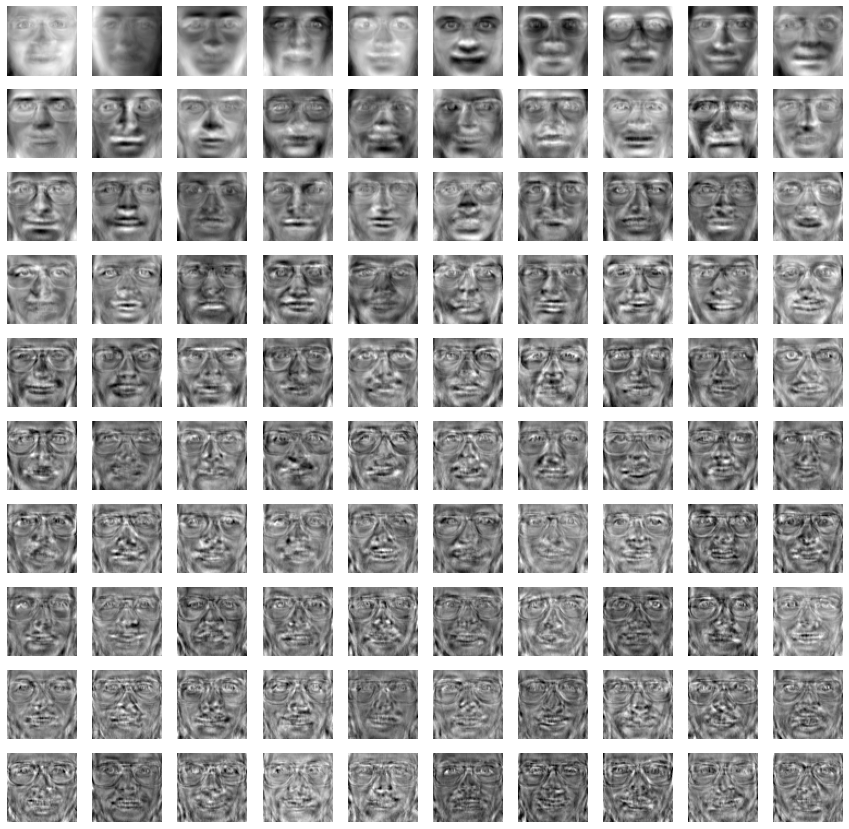

In [33]:
humanCenData = centerData(humanTrain, humanMean)
humanCov = computeCovariance(humanCenData)
humanEigvals, humanEigVectors = getEigVecsVals(humanCov)
humanEigVals = humanEigvals[::-1]
humanEigVectors = humanEigVectors.T[::-1]
plotEigens(humanEigVectors, humanDim)

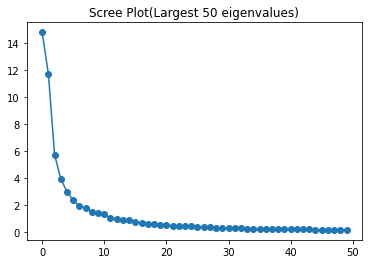

In [34]:
plotScree(humanEigVals)

### Human Test

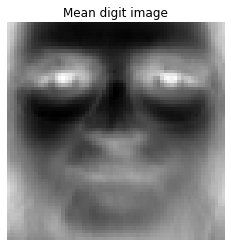

In [35]:
hTestMean = plotMean(humanTest)
testCenData = centerData(humanTest, hTestMean)

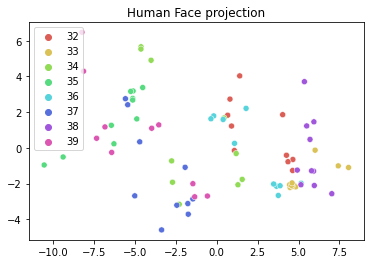

In [36]:
finalData = projection(testCenData, humanEigVectors, 2).T
testTargetLen = len(np.unique(testTarget))
plotProjection(finalData, testTarget, "Human Face projection", testTargetLen)

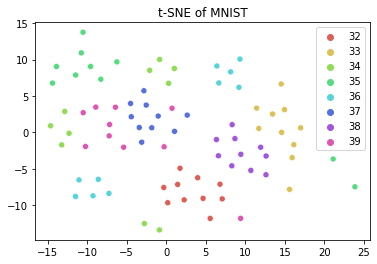

In [37]:
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(humanTest)
plotProjection(tsne, testTarget, "t-SNE of MNIST", testTargetLen)

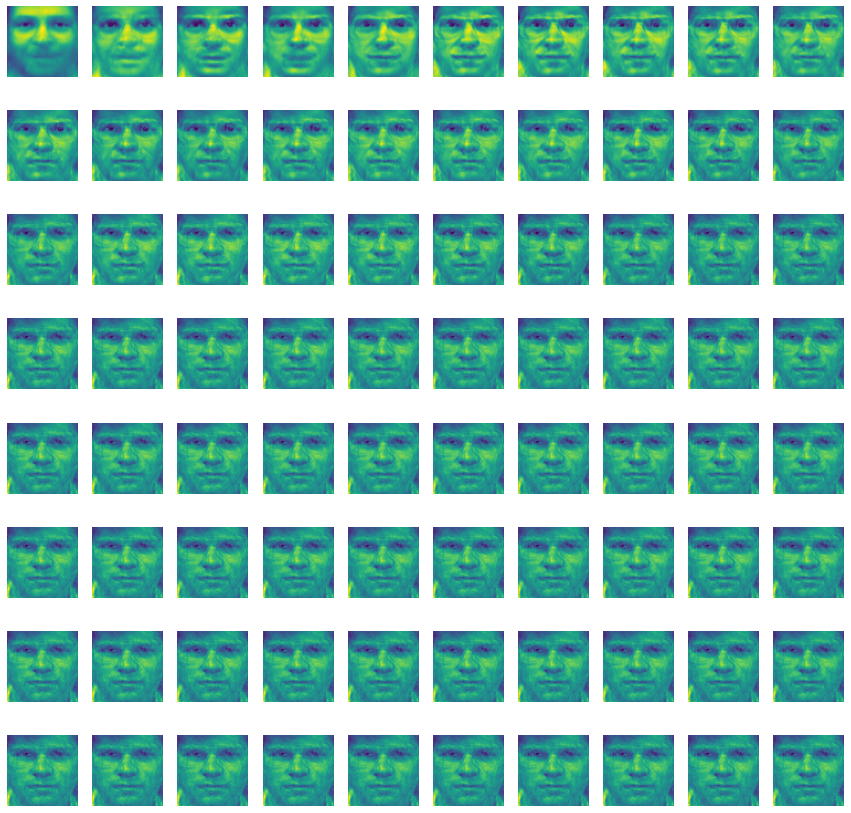

In [38]:
reconstructAll(testCenData, hTestMean, 0, humanEigVectors, humanDim, 2, 784)

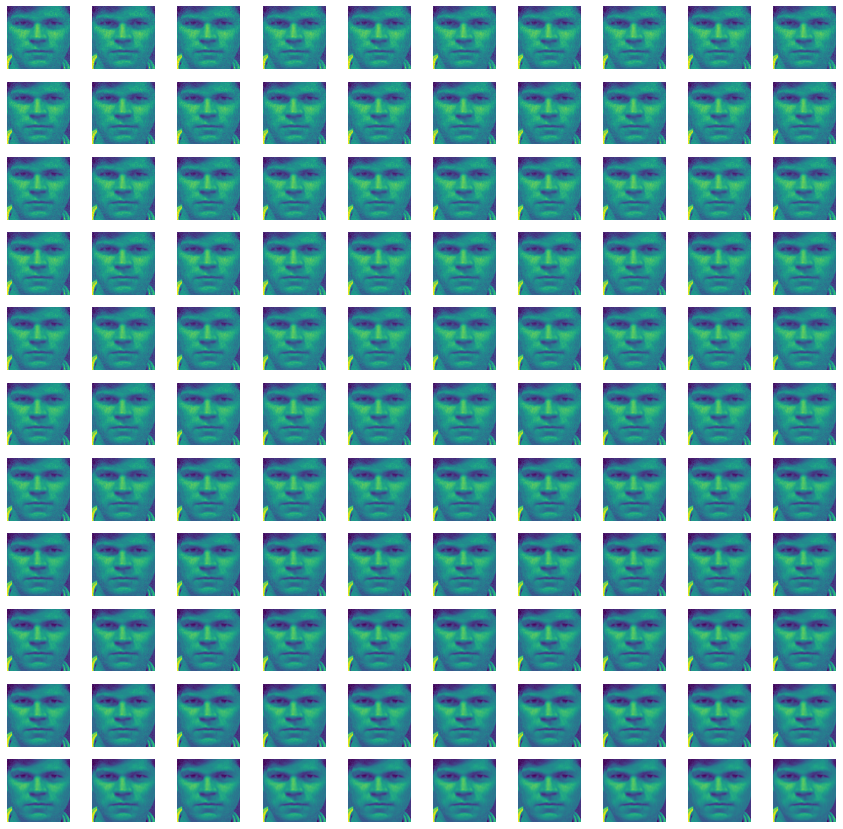

In [39]:
reconstructAll(testCenData, hTestMean, 0, humanEigVectors, humanDim, 3000, 4096)

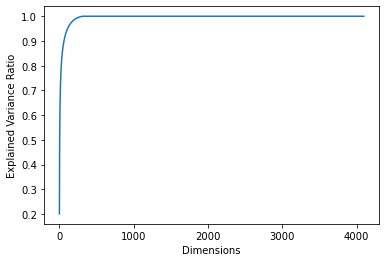

0.9635917289951408 133


In [40]:
humanExpVarRatio, index2 = getExplainedVarRatio(humanEigVals)
print(humanExpVarRatio[index2], index2)

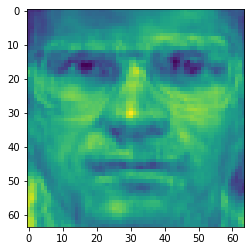

In [41]:
reconstructed = projectReconstruct(testCenData[0], hTestMean, index2, humanEigVectors)
plt.imshow(reconstructed.reshape((humanDim,humanDim)))

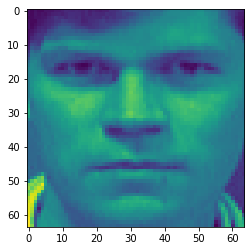

In [42]:
plt.imshow(humanTest[0].reshape((humanDim,humanDim)))